In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [33]:
df = pd.read_csv('measurements/pattern_2_v1_20240514_15_06_00.csv', sep=', ')
# df = pd.read_csv('measurements/E_4_20ms_20231103_14_55_46.csv', sep=', ')

/var/folders/kd/06h1fnvx0vx2r2dm7rqhqb6r0000gn/T/ipykernel_1902/352830212.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('measurements/pattern_2_v1_20240514_15_06_00.csv', sep=', ')


In [34]:
df = df[df.Probeflag]
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),Ch11(mA),...,Ch14(mA),Ch15(mA),Ch16(mA),Channel state,On time,Off time,Pulse number,Pattern,Time,Probeflag
5000,0.8504,1.261,1.149,1.119,1.427,1.017,1.437,1.432,1.413,0.7869,...,1.525,1.711,0.8065,1111111111111111,50,70,1,2/785,601.356876,True
5001,0.8504,1.261,1.153,1.119,1.427,1.017,1.437,1.432,1.413,0.7869,...,1.525,1.706,0.8065,1111111111111111,50,70,1,3/785,601.476268,True
5002,0.8504,1.261,1.153,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,4/785,601.599054,True
5003,0.8504,1.266,1.153,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,5/785,601.718814,True
5004,0.8504,1.266,1.149,1.119,1.422,1.017,1.437,1.432,1.413,0.7918,...,1.525,1.706,0.8065,1111111111111111,50,70,1,6/785,601.841801,True


In [35]:
size = df.shape[0]
size

784

In [13]:
current_simulated = np.load(f'outputs/x_train_current_linearized.npy')

Text(0.5, 1.0, 'Device output per row signal')

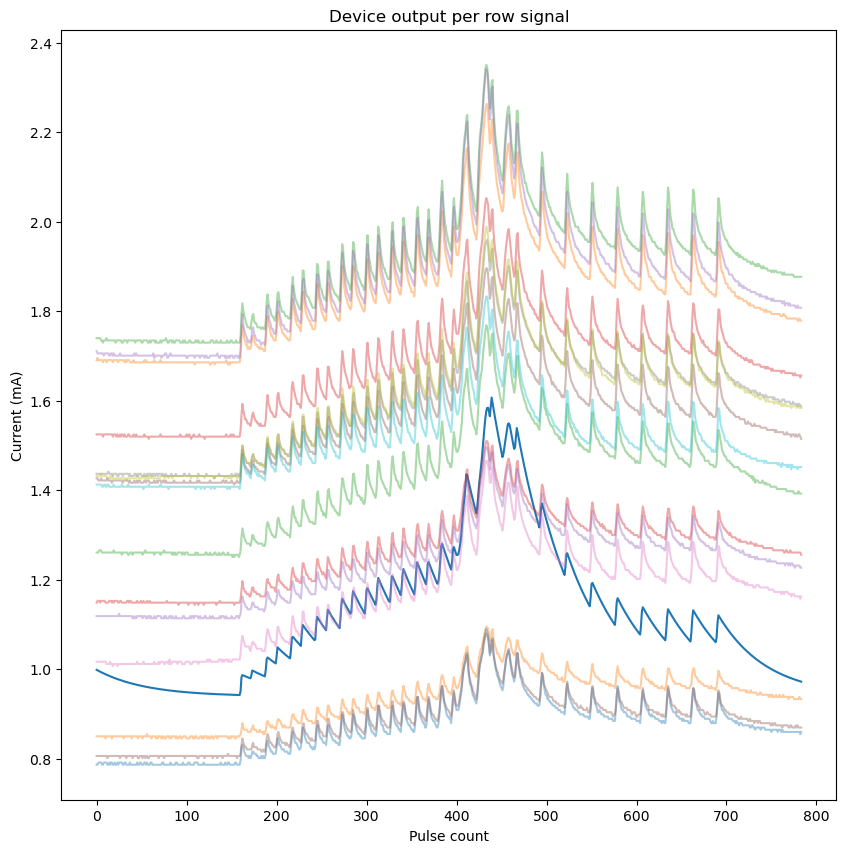

In [36]:
plt.figure(figsize=(10, 10))

plt.plot(range(size),current_simulated[2], linestyle='-',label = 'simulation')
for i in range(1,17):
   if f'Ch{i}(mA)'in df.columns:
      plt.plot(range(size),df[f'Ch{i}(mA)'], linestyle='-',label = f'Ch{i}',alpha=0.4)

#plt.legend()
plt.xlabel('Pulse count')
plt.ylabel('Current (mA)')
plt.title('Device output per row signal')

Text(0.5, 1.0, 'Device output per row signal')

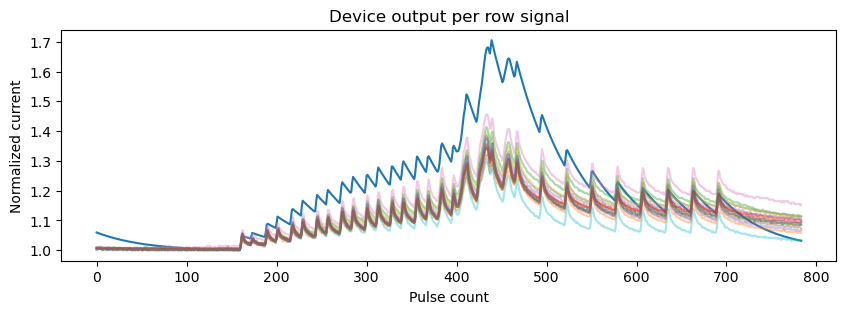

In [38]:
plt.figure(figsize=(10, 3))

plt.plot(range(size),current_simulated[2]/current_simulated[2].min(), linestyle='-',label = 'simulation')
for i in range(1,17):
   if f'Ch{i}(mA)'in df.columns:
      plt.plot(range(size),df[f'Ch{i}(mA)']/df[f'Ch{i}(mA)'].min(), linestyle='-',label = f'Ch{i}',alpha=0.4)

#plt.legend()
plt.xlabel('Pulse count')
plt.ylabel('Normalized current')
plt.title('Device output per row signal')